# Social Media Analytics - Apple vs. Samsung

In [3]:
%%time
import pandas as pd
others_data = pd.read_pickle("./data/FullSize_preprocessed_othersData")
twitter_data = pd.read_pickle("./data/FullSize_preprocessed_twitterData")
twitter_data.columns = twitter_data.columns.str.replace(' ', '')
others_data.columns = others_data.columns.str.replace(' ', '')

CPU times: user 956 ms, sys: 292 ms, total: 1.25 s
Wall time: 1.25 s


In [5]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber

import seaborn as sns
%matplotlib inline

## Sentiment Prediction Using NaiveBayes and Text-Blob

In [7]:
#read the file
data = pd.read_csv("sts_gold_tweet.csv", sep=";", encoding="utf-8").drop('id', 1)

# replace 4 with 'post' and 0 as 'neg' in 'polarity' column
data['polarity'] = data.replace({4: 'post', 0: 'neg'})

# convert the data into a list
data = data[['tweet', 'polarity']].values.tolist()

L = len(data)
train_index = int(0.70 * L)

# split the data into a train and test data
train, test = data[:train_index], data[train_index: ]

In [8]:
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [9]:
cl = NaiveBayesClassifier(train)
print('Accuracy:',str(round(cl.accuracy(test), 4)*100) + "%")

Accuracy: 88.87%


In [10]:
blob = TextBlob("The beer is not very good.", classifier=cl)
blob.sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [11]:
import pickle
pickled_classifier_file = open('sentiment_classifier.obj', 'wb')
pickle.dump(cl, pickled_classifier_file)
pickled_classifier_file.close()

In [12]:
cl = pickle.load(open('sentiment_classifier.obj', 'rb'))

In [13]:
tb_twitter = Blobber(analyzer=NaiveBayesAnalyzer(), classifier=cl)
twitter_data[['nb_sentiment', 'nb_pos', 'nb_neg']] = twitter_data.SoundBiteText.apply(lambda v: pd.Series(tb_twitter(v).sentiment))

In [14]:
import numpy as np

In [15]:
twitter_data['PublishedDate(GMT-04:00)NewYork'] = pd.to_datetime(twitter_data['PublishedDate(GMT-04:00)NewYork'])
twitter_data['SamsungLaunch'] = np.where(twitter_data['PublishedDate(GMT-04:00)NewYork']< '2017-4-21', 'pre', 'post')
twitter_data['AppleLaunch'] = np.where(twitter_data['PublishedDate(GMT-04:00)NewYork'] < '2017-9-22', 'pre', 'post')
twitter_data.head()

,PostID,SoundBiteText,RatingsandScores,Title,SourceType,PostType,MediaType,URL,Domain,PublishedDate(GMT-04:00)NewYork,...,ProductHierarchy,Rating,preLaunch,ContainsSamsungKeyword,ContainsAppleKeyword,nb_sentiment,nb_pos,nb_neg,SamsungLaunch,AppleLaunch
0,8.767150e+17,RT @grattongirl: iPhone 8 To Feature 5G Intern...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/KevinAMoon/statuses/8767150...,twitter.com,2017-06-19 04:15:28,...,NaN,NaN,1,0,1,pos,0.814763,0.185237,post,pre
1,8.640177e+17,RT @iDeviceCare: The price of the iPhone 8 wil...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/jerryluti/statuses/86401768...,twitter.com,2017-05-15 03:20:44,...,NaN,NaN,1,0,1,pos,0.543733,0.456267,post,pre
2,8.802432e+17,RT @9to5mac: What iOS 11 tells us about the iP...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/IssaNY25/statuses/880243202...,twitter.com,2017-06-28 21:55:08,...,NaN,NaN,1,0,1,pos,0.552365,0.447635,post,pre
3,8.540839e+17,Samsung Galaxy S8 and S8 Plus undergo a Batter...,NaN,NaN,Twitter,Original,Image; Link,http://twitter.com/gdelussigny/statuses/854083...,twitter.com,2017-04-17 17:27:25,...,NaN,NaN,1,1,0,neg,0.226337,0.773663,pre,pre
4,8.577652e+17,"""Another iPhone 8 leak hints at wireless charg...",NaN,NaN,Twitter,Original,Link,http://twitter.com/trothwell_null/statuses/857...,twitter.com,2017-04-27 21:15:23,...,NaN,NaN,1,0,1,neg,0.459040,0.540960,post,pre


In [16]:
tb_other = Blobber(analyzer=NaiveBayesAnalyzer(), classifier = cl)
others_data[['nb_sentiment', 'nb_pos', 'nb_neg']] = others_data.SoundBiteText.apply(lambda v: pd.Series(tb_other(v).sentiment))

In [80]:
others_data['SamsungLaunch'] = np.where(others_data['PublishedDate(GMT-04:00)NewYork']< '2017-4-21', 'pre', 'post')
others_data['AppleLaunch'] = np.where(others_data['PublishedDate(GMT-04:00)NewYork'] < '2017-9-22', 'pre', 'post')
others_data.head()

,PostID,SoundBiteText,RatingsandScores,Title,SourceType,PostType,MediaType,URL,Domain,PublishedDate(GMT-04:00)NewYork,...,ContainsSamsungKeyword,ContainsAppleKeyword,TitleContainsSamsungKeyword,TitleContainsAppleKeyword,nb_sentiment,nb_pos,nb_neg,SamsungLaunch,AppleLaunch,Post Words
0,13825380473817448808,Expect to see new iPhones and perhaps even a n...,NaN,"CES, MWC, Nintendo Switch Launch, and Other Bi...",Blogs,Original,No Media,http://www.newseleven.in/ces-mwc-nintendo-swit...,newseleven.in,2017-04-20 21:13:52,...,1,1,0,0,pos,0.864249,1.357512e-01,pre,pre,expect iphones perhaps even apple watch apart ...
2,9337391971751724366,"Another day, yet another iPhone 8 related leak...",NaN,First Alleged iPhone 8 Case Leaks Out,Blogs,Original,No Media,http://www.iphoneheat.com/2017/04/first-allege...,iphoneheat.com,2017-04-28 11:42:13,...,0,1,0,1,pos,1.000000,1.176787e-07,post,pre,another another iphone related leak time seein...
3,17544193402783759233,"Thinner than a phone, and connected to the gut...",NaN,The Future Of Television - If You Can Afford It,Blogs,Original,No Media,http://futurelawyer.typepad.com/futurelawyer/2...,futurelawyer.typepad.com,2017-05-02 05:48:01,...,1,0,0,0,pos,0.911680,8.832022e-02,post,pre,thinner phone connected gut sound tiny ribbon ...
4,5208659001078692049,"Before its official release date, Samsung’s Ga...",NaN,Software update rolling out to T-Mobile’s Sams...,Blogs,Original,No Media,http://www.androidomg.com/2017/04/software-upd...,androidomg.com,2017-04-20 21:39:00,...,1,0,1,0,pos,0.828959,1.710407e-01,pre,pre,official release date samsung galaxy t mobile ...
6,11606283394652775640,Even while Sony has been witnessing some insta...,NaN,Sony Xperia X Ultra with 6.45 inch display wit...,Blogs,Original,No Media,https://www.mobigyaan.com/sony-xperia-x-ultra-...,mobigyaan.com,2017-05-02 06:42:02,...,1,0,0,0,neg,0.025915,9.740850e-01,post,pre,even sony witnessing instability global smartp...


In [18]:
others_data['PublishedDate(GMT-04:00)NewYork'] = pd.to_datetime(others_data['PublishedDate(GMT-04:00)NewYork'])
others_prelaunch = others_data[(others_data['PublishedDate(GMT-04:00)NewYork'] < '2017-6-30')]
others_postlaunch = others_data[(others_data['PublishedDate(GMT-04:00)NewYork'] > '2017-9-1')]

**Positive vs Negative Sentiment on Twitter Data**

<BarContainer object of 2 artists>

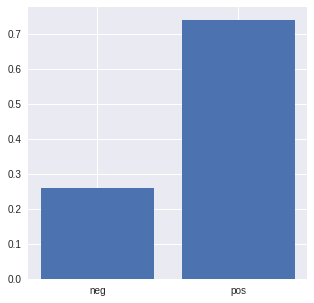

In [74]:
plot_dt = pd.DataFrame((twitter_data.groupby("nb_sentiment")).aggregate(pd.Series.count)["PostID"])
ht = np.array(plot_dt) / np.sum(np.array(plot_dt))
df_ht = pd.DataFrame(ht)
plt.figure(figsize=(5,5))
plt.bar(x = plot_dt.index , height = ht[:,0])

**Positive vs Negative Sentiment on Non-Twitter Data**

<BarContainer object of 2 artists>

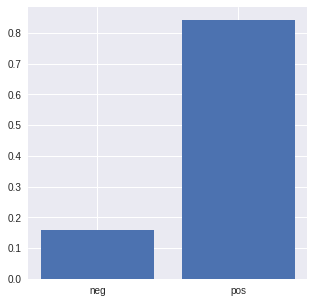

In [54]:
plot_dt = pd.DataFrame((others_data.groupby("nb_sentiment")).aggregate(pd.Series.count)["PostID"])
ht = np.array(plot_dt) / np.sum(np.array(plot_dt))
df_ht = pd.DataFrame(ht)
plt.figure(figsize=(5,5))
plt.bar(x = plot_dt.index , height = ht[:,0])

**Positive vs Negative Sentiment on Twitter Data - Before and After Samsung Launch**

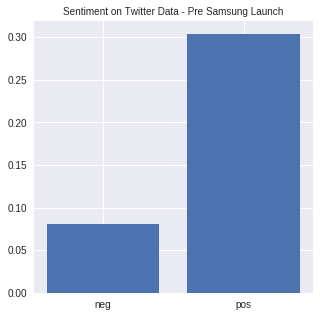

In [72]:
pos_neg_pre = twitter_data.groupby(['nb_sentiment','SamsungLaunch'])['SoundBiteText'].count().reset_index()
pos_neg_pre.rename(columns={'SoundBiteText': 'Count'}, inplace=True)
sum = pos_neg_pre['Count'].sum()
pos_neg_pre['Count'] = pos_neg_pre['Count']/sum
pos_neg_preLaunch = pos_neg_pre[pos_neg_pre['SamsungLaunch']=='pre']
pos_neg_postLaunch = pos_neg_pre[pos_neg_pre['SamsungLaunch']=='post']

xs = pos_neg_preLaunch['nb_sentiment']
ys = pos_neg_preLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Twitter Data - Pre Samsung Launch', fontsize = 10)
plt.show()

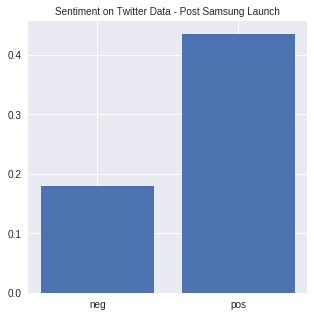

In [73]:
xs = pos_neg_postLaunch['nb_sentiment']
ys = pos_neg_postLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Twitter Data - Post Samsung Launch', fontsize = 10)
plt.show()

**Positive vs Negative Sentiment on Twitter Data - Before and After Apple Launch**

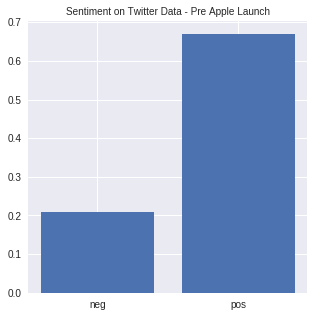

In [76]:
pos_neg_pre = twitter_data.groupby(['nb_sentiment','AppleLaunch'])['SoundBiteText'].count().reset_index()
pos_neg_pre.rename(columns={'SoundBiteText': 'Count'}, inplace=True)
sum = pos_neg_pre['Count'].sum()
pos_neg_pre['Count'] = pos_neg_pre['Count']/sum
pos_neg_preLaunch = pos_neg_pre[pos_neg_pre['AppleLaunch']=='pre']
pos_neg_postLaunch = pos_neg_pre[pos_neg_pre['AppleLaunch']=='post']

xs = pos_neg_preLaunch['nb_sentiment']
ys = pos_neg_preLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Twitter Data - Pre Apple Launch', fontsize = 10)
plt.show()

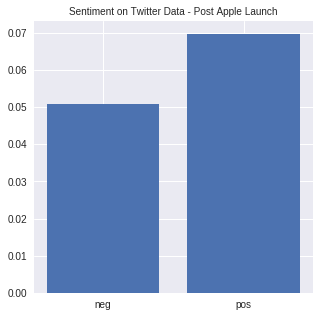

In [77]:
xs = pos_neg_postLaunch['nb_sentiment']
ys = pos_neg_postLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Twitter Data - Post Apple Launch', fontsize = 10)
plt.show()

**Positive vs Negative Sentiment on Non-Twitter Data - Before and After Samsung Launch**

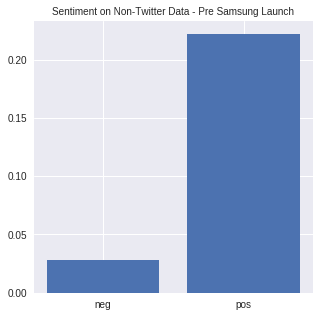

In [82]:
pos_neg_pre = others_data.groupby(['nb_sentiment','SamsungLaunch'])['SoundBiteText'].count().reset_index()
pos_neg_pre.rename(columns={'SoundBiteText': 'Count'}, inplace=True)
sum = pos_neg_pre['Count'].sum()
pos_neg_pre['Count'] = pos_neg_pre['Count']/sum

pos_neg_preLaunch = pos_neg_pre[pos_neg_pre['SamsungLaunch']=='pre']
pos_neg_postLaunch = pos_neg_pre[pos_neg_pre['SamsungLaunch']=='post']

xs = pos_neg_preLaunch['nb_sentiment']
ys = pos_neg_preLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Non-Twitter Data - Pre Samsung Launch', fontsize = 10)
plt.show()

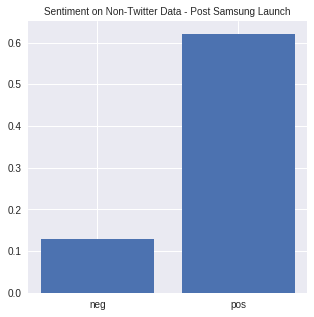

In [83]:
xs = pos_neg_postLaunch['nb_sentiment']
ys = pos_neg_postLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Non-Twitter Data - Post Samsung Launch', fontsize = 10)
plt.show()

**Positive vs Negative Sentiment on Non-Twitter Data - Before and After Apple Launch**

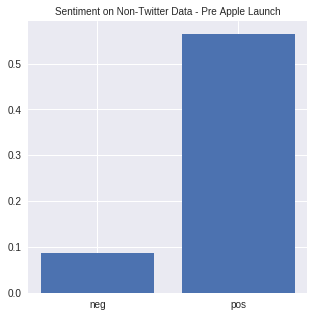

In [85]:
pos_neg_pre = others_data.groupby(['nb_sentiment','AppleLaunch'])['SoundBiteText'].count().reset_index()
pos_neg_pre.rename(columns={'SoundBiteText': 'Count'}, inplace=True)
sum = pos_neg_pre['Count'].sum()
pos_neg_pre['Count'] = pos_neg_pre['Count']/sum
pos_neg_preLaunch = pos_neg_pre[pos_neg_pre['AppleLaunch']=='pre']
pos_neg_postLaunch = pos_neg_pre[pos_neg_pre['AppleLaunch']=='post']

xs = pos_neg_preLaunch['nb_sentiment']
ys = pos_neg_preLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Non-Twitter Data - Pre Apple Launch', fontsize = 10)
plt.show()

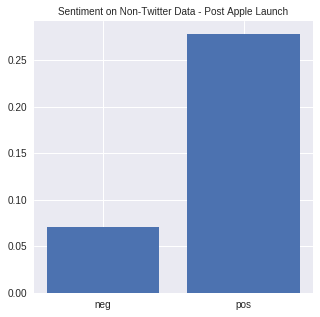

In [86]:
xs = pos_neg_postLaunch['nb_sentiment']
ys = pos_neg_postLaunch['Count']
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.bar(xs,ys)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment on Non-Twitter Data - Post Apple Launch', fontsize = 10)
plt.show()

We see a lot of positive sentiments regarding these two products in comparison to the negative components since both of these are great products.

In [21]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
print(others_data.shape)
print(twitter_data.shape)

(378651, 50)
(48021, 49)


In [22]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Finding synonyms of price, value and quality**

In [24]:
from nltk.corpus import wordnet 
synonyms_price = []
for syn in wordnet.synsets('price'):
    for lemma in syn.lemmas():
        synonyms_price.append(lemma.name())
print(synonyms_price)

synonyms_value = []
for syn in wordnet.synsets('value'):
    for lemma in syn.lemmas():
        synonyms_value.append(lemma.name())
print(synonyms_value)

synonyms_quality = []
for syn in wordnet.synsets('quality'):
    for lemma in syn.lemmas():
        synonyms_quality.append(lemma.name())
print(synonyms_quality)

['monetary_value', 'price', 'cost', 'price', 'terms', 'damage', 'price', 'cost', 'toll', 'price', 'price', 'price', 'Price', 'Leontyne_Price', 'Mary_Leontyne_Price', 'price', 'price']
['value', 'value', 'value', 'economic_value', 'value', 'value', 'time_value', 'note_value', 'value', 'value', 'prize', 'value', 'treasure', 'appreciate', 'respect', 'esteem', 'value', 'prize', 'prise', 'measure', 'evaluate', 'valuate', 'assess', 'appraise', 'value', 'rate', 'value']
['quality', 'quality', 'caliber', 'calibre', 'quality', 'character', 'lineament', 'timbre', 'timber', 'quality', 'tone', 'quality', 'choice', 'prime', 'prize', 'quality', 'select', 'quality']


In [25]:
quality = list(set(synonyms_quality)) 
quality_str =''
for x in quality:
    quality_str += x + "|"
quality_str = quality_str[0:len(quality_str)-1]

In [28]:
price = list(set(synonyms_price)) 
price_str =''
for x in price:    
    price_str += x + "|"
price_str=price_str[0:len(price_str)-1]

In [29]:
value = list(set(synonyms_value))
value_str =''
for x in value:
    value_str += (x + "|")
value_str = value_str[0:len(value_str)-1]

## Pre-processing data for LDA

In [30]:
#added a few more stop words to our list of words
stop = stopwords.words('english') + list(string.punctuation) + ['com','dlvr','it','http','gl','as','led'] +['raengi0921','exoglobal','exocastle','twitter','youtube']
tweets = twitter_data['SoundBiteText']
other_posts = others_data['SoundBiteText']

In [35]:
# lemmatizing twitter data
lemmatizer = nltk.stem.WordNetLemmatizer()

tweets_list = list(tweets)
list2 = []
count=0
for x in tweets_list:
    list2.append([lemmatizer.lemmatize(i) for i in word_tokenize(x.lower()) if i not in stop and len(i)>3])
    count = count+1             

In [36]:
# lemmatizing non-twitter data
lemmatizer = nltk.stem.WordNetLemmatizer()

others_list = list(other_posts)
list3 = []
count=0
for x in others_list:
    list3.append([lemmatizer.lemmatize(i) for i in word_tokenize(x.lower()) if i not in stop and len(i)>3])
    count = count+1               

In [37]:
import re

twitter_data['Lemmatized post'] = list2
twitter_data['Post Words'] = [' '.join(map(str, l)) for l in twitter_data['Lemmatized post']]
twitter_data['Post Words'] = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l).split()) for l in twitter_data['Post Words']]
twitter_data.head()

,PostID,SoundBiteText,RatingsandScores,Title,SourceType,PostType,MediaType,URL,Domain,PublishedDate(GMT-04:00)NewYork,...,preLaunch,ContainsSamsungKeyword,ContainsAppleKeyword,nb_sentiment,nb_pos,nb_neg,SamsungLaunch,AppleLaunch,Lemmatized post,Post Words
0,8.767150e+17,RT @grattongirl: iPhone 8 To Feature 5G Intern...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/KevinAMoon/statuses/8767150...,twitter.com,2017-06-19 04:15:28,...,1,0,1,pos,0.814763,0.185237,post,pre,"[grattongirl, iphone, feature, internet, speed...",grattongirl iphone feature internet speed test...
1,8.640177e+17,RT @iDeviceCare: The price of the iPhone 8 wil...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/jerryluti/statuses/86401768...,twitter.com,2017-05-15 03:20:44,...,1,0,1,pos,0.543733,0.456267,post,pre,"[idevicecare, price, iphone, start, 1000, acco...",idevicecare price iphone start 1000 according ...
2,8.802432e+17,RT @9to5mac: What iOS 11 tells us about the iP...,NaN,NaN,Twitter,Retweets and Reblogs,Image; Link,http://twitter.com/IssaNY25/statuses/880243202...,twitter.com,2017-06-28 21:55:08,...,1,0,1,pos,0.552365,0.447635,post,pre,"[9to5mac, tell, iphone, 9to5mac.com/2017/06/28...",9to5mac tell iphone 9to5mac com 2017 06 28 wha...
3,8.540839e+17,Samsung Galaxy S8 and S8 Plus undergo a Batter...,NaN,NaN,Twitter,Original,Image; Link,http://twitter.com/gdelussigny/statuses/854083...,twitter.com,2017-04-17 17:27:25,...,1,1,0,neg,0.226337,0.773663,pre,pre,"[samsung, galaxy, plus, undergo, battery, drai...",samsung galaxy plus undergo battery drain test...
4,8.577652e+17,"""Another iPhone 8 leak hints at wireless charg...",NaN,NaN,Twitter,Original,Link,http://twitter.com/trothwell_null/statuses/857...,twitter.com,2017-04-27 21:15:23,...,1,0,1,neg,0.459040,0.540960,post,pre,"[another, iphone, leak, hint, wireless, chargi...",another iphone leak hint wireless charging alw...


In [38]:
import re

others_data['Lemmatized post'] = list3
others_data['Post Words'] = [' '.join(map(str, l)) for l in others_data['Lemmatized post']]
others_data['Post Words'] = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",l).split()) for l in others_data['Post Words']]
del list2,list3,others_data['Lemmatized post'],twitter_data['Lemmatized post']

In [41]:
df_merged = pd.concat([twitter_data,others_data])
df_merged = df_merged[['SoundBiteText','ContainsSamsungKeyword', 'ContainsAppleKeyword','SourceType','PublishedDate(GMT-04:00)NewYork']]
df_merged.head()

,SoundBiteText,ContainsSamsungKeyword,ContainsAppleKeyword,SourceType,PublishedDate(GMT-04:00)NewYork
0,RT @grattongirl: iPhone 8 To Feature 5G Intern...,0,1,Twitter,2017-06-19 04:15:28
1,RT @iDeviceCare: The price of the iPhone 8 wil...,0,1,Twitter,2017-05-15 03:20:44
2,RT @9to5mac: What iOS 11 tells us about the iP...,0,1,Twitter,2017-06-28 21:55:08
3,Samsung Galaxy S8 and S8 Plus undergo a Batter...,1,0,Twitter,2017-04-17 17:27:25
4,"""Another iPhone 8 leak hints at wireless charg...",0,1,Twitter,2017-04-27 21:15:23


**Visualizing Distribution by Source Type**

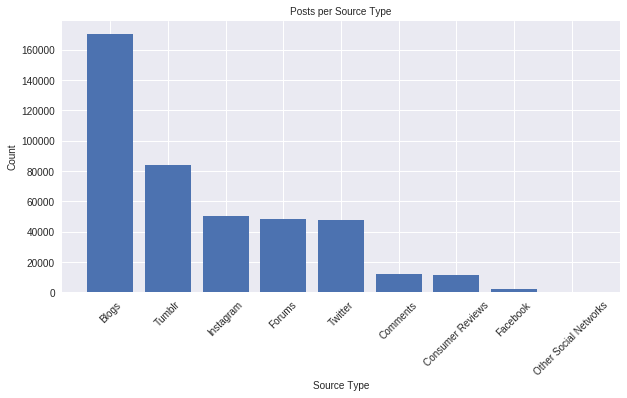

In [43]:
#count -- Total
df_counts_type = df_merged.groupby(['SourceType'])['ContainsSamsungKeyword'].count().reset_index()
df_counts_type.rename(columns={'ContainsSamsungKeyword': 'Count'}, inplace=True)
df_counts_type = df_counts_type.sort_values('Count', ascending=False)

xs = df_counts_type['SourceType']
ys = df_counts_type['Count']
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.bar(xs,ys)
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Posts per Source Type', fontsize = 10)
plt.xlabel('Source Type', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

del df_counts_type

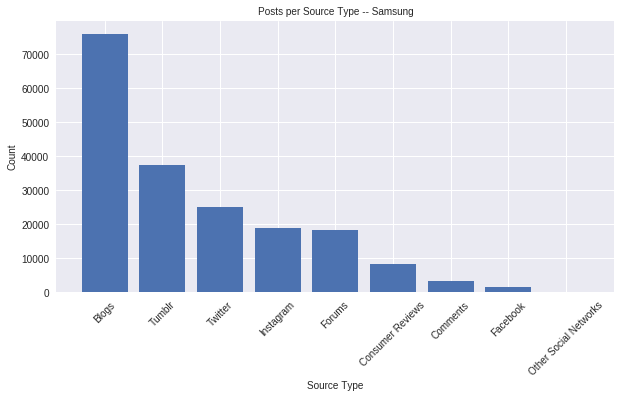

In [44]:
#count -- Samsung
df_Samsung = df_merged[df_merged['ContainsSamsungKeyword']==1]
df_Samsung = df_Samsung[df_Samsung['ContainsAppleKeyword']==0]
df_counts_type_Samsung = df_Samsung.groupby(['SourceType'])['ContainsSamsungKeyword'].count().reset_index()
df_counts_type_Samsung.rename(columns={'ContainsSamsungKeyword': 'Count'}, inplace=True)
df_counts_type_Samsung = df_counts_type_Samsung.sort_values('Count', ascending=False)

xs = df_counts_type_Samsung['SourceType']
ys = df_counts_type_Samsung['Count']
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.bar(xs,ys)
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Posts per Source Type -- Samsung', fontsize = 10)
plt.xlabel('Source Type', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

del df_Samsung,df_counts_type_Samsung

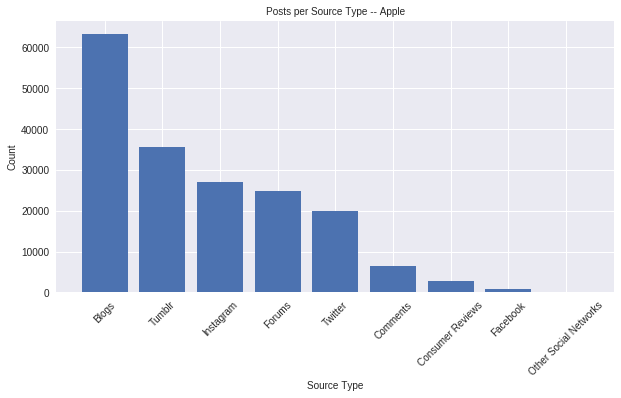

In [45]:
#count -- Only Apple
df_Apple = df_merged[df_merged['ContainsAppleKeyword']==1]
df_Apple = df_Apple[df_Apple['ContainsSamsungKeyword']==0]
df_counts_type_Apple = df_Apple.groupby(['SourceType'])['ContainsAppleKeyword'].count().reset_index()
df_counts_type_Apple.rename(columns={'ContainsAppleKeyword': 'Count'}, inplace=True)
df_counts_type_Apple = df_counts_type_Apple.sort_values('Count', ascending=False)

xs = df_counts_type_Apple['SourceType']
ys = df_counts_type_Apple['Count']
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.bar(xs,ys)
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Posts per Source Type -- Apple', fontsize = 10)
plt.xlabel('Source Type', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

del df_Apple, df_counts_type_Apple

In [46]:
del df_merged

In [27]:
%%time
# Data LDA
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.feature_extraction.text import TfidfVectorizer

def LDA(x_input):
    transformer = TfidfVectorizer(stop_words = stop)
    X_norm = transformer.fit_transform(x_input['Post Words'])

    del x_input
    lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                    n_jobs=-1,
                                    random_state=0)
    lda.fit(X_norm)
    topics = lda.transform(X_norm)

    import numpy as np
    topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                         for topic_word_pseudocounts in lda.components_])
    del lda
    return (transformer,topic_word_distributions)

def printResults(transformer,topic_word_distributions):
    for topic_idx in range(5):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        for rank in range(20):
            word_idx = sort_indices[rank]
            print(transformer.get_feature_names()[word_idx], ':', topic_word_distributions[topic_idx, word_idx])
        print()

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 17.8 ms


## What were the most important attributes for each product? (Twitter vs Non-Twitter)

**Attributes of Samsung from Twitter data**

In [28]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung_and_not_apple = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
del twitter_samsung

transformer1,topic_distr1 = LDA(twitter_samsung_and_not_apple)
printResults(transformer1,topic_distr1)
del twitter_samsung_and_not_apple

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
pic : 0.014903708060496903
twitter : 0.014381009155062744
galaxy : 0.01228600845267877
samsung : 0.012100059156763734
photo : 0.010706579086918092
unreleased : 0.006816473435516317
unseen : 0.00666404986960845
exoglobal : 0.006462748793513988
chen : 0.006461648490206255
samsungmobileus : 0.005808454565448657
raengi0921 : 0.005215717421057233
hate : 0.004981412931178342
korean : 0.004842736764201443
picture : 0.004798969623572926
hand : 0.004773685905343583
youtube : 0.004643196374686258
official : 0.004617428208206047
phone : 0.004267899955231308
youtu : 0.0042460844455592325
video : 0.0041987397155540005

[Topic 1]
galaxy : 0.017993983389465604
samsung : 0.014891659464971646
twitter : 0.010063533846273865
pic : 0.009900603726873791
youtu : 0.009216438411372254
youtube : 0.008459650142411086
video : 0.008355592987019822
2017 : 0.006892114007869509
s8 : 0.006830449904456449
plus : 0.006223220173760141
liked : 0.005560249297090332
bixby : 0.005400144878018583
screen : 0.0052

In [30]:
#generating a word cloud of the most important attributes
from wordcloud import WordCloud

def generateWordCloud(transformer,topic_word_distributions):
    words=''
    for topic_idx in range(5):
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        for rank in range(20):
            word_idx = sort_indices[rank]
            words = words + transformer.get_feature_names()[word_idx] + ' '
    return words

In [53]:
wrds = generateWordCloud(transformer1,topic_distr1)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(stp_words),      
                min_font_size = 10).generate(wrds)

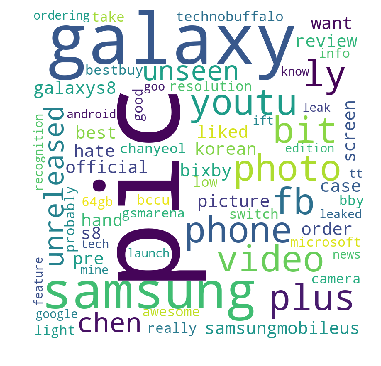

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [55]:
del transformer1,topic_distr1

**Attributes of Samsung from Non-Twitter data**

In [28]:
others_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_samsung_and_not_apple = others_samsung.loc[others_samsung['ContainsAppleKeyword']==0]
del others_samsung

# print(others_samsung_and_not_apple.shape)
transformer1,topic_distr1 = LDA(others_samsung_and_not_apple.sample(10000))
printResults(transformer1,topic_distr1)
del others_samsung_and_not_apple

1
2
3
(163385, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
co : 0.009910230397293726
ifttt : 0.003149265469946718
tag : 0.003007479097190601
samsungs8 : 0.0028252543494365658
martinguayott : 0.0021487415392141447
trending : 0.0020772303536219366
canada : 0.0019888165647358284
taeyeon : 0.0017874124183513748
galaxys8 : 0.001207815932916644
pic : 0.0011812012361086697
tech : 0.0011249556263052936
newphone : 0.0010452712994400717
170418 : 0.0009734643199253417
s8 : 0.0009389013247855885
androidauth : 0.0008989022536514045
snsd : 0.0008877861174306462
samsung : 0.0008240781765175013
status : 0.000767018792007783
sehun : 0.0007389480772536392
girlsgeneration : 0.0007297129748569826

[Topic 1]
pinterest : 0.008800645452218989
androbrix : 0.0042169248855031885
pinned : 0.003383230865431614
reply : 0.0027863235239198834
cell : 0.00247745802743569
pin : 0.002108426170064205
question : 0.002000088849389655
gadget : 0.0017232123284266583
pinboard : 0.0016338626961828018
sent : 0.0013802234398531856
forum : 0.0013333580580139
hasty : 0.001304

In [32]:
#generating a word cloud of the most important attributes
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

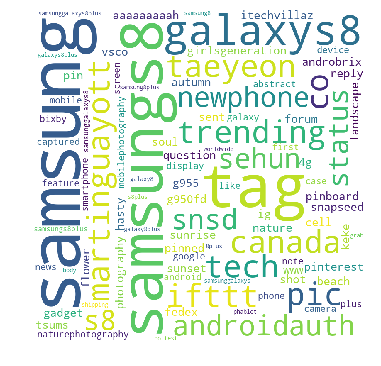

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

**Attributes of Apple from Twitter data**

In [35]:
del transformer1,topic_distr1

others_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_samsung_and_not_apple = others_samsung.loc[others_samsung['ContainsAppleKeyword']==1]
del others_samsung

# print(others_samsung_and_not_apple.shape)
transformer1,topic_distr1 = LDA(others_samsung_and_not_apple.sample(20000))
printResults(transformer1,topic_distr1)
del others_samsung_and_not_apple

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
kidney : 0.0012057593768194637
humorstar : 0.0011656398748422661
needing : 0.0011197781205100226
meme : 0.0010418432883972336
rover : 0.0009863132255855756
snpx : 0.0009259105410383494
thanks : 0.0008532886984419246
550k : 0.0008224660073079571
keep : 0.0007298437266260246
tk : 0.0006404826863689924
food : 0.0006336535943205634
pici : 0.0006197349666487254
ebay : 0.0006055537231603294
cashback : 0.0005780270349453878
still : 0.0005636748677059385
bid : 0.0005132789350788463
19255 : 0.0004911816748145184
toolid : 0.0004911816747777807
lgeo : 0.0004911816747728616
customid : 0.0004911816747077542

[Topic 1]
iphone8 : 0.012591790551417396
iphone8plus : 0.010368632736714555
iphone : 0.009937878304116465
plus : 0.007821724150562762
gold : 0.007069129034877414
64gb : 0.005642472287397073
apple : 0.005262370608755957
unlocked : 0.004828522971706356
silver : 0.004349074901724268
iphonex : 0.00420859279008799
256gb : 0.004163883104472948
case : 0.0033046280441867775
space : 0.00313

In [36]:
#generating a word cloud of the most important attributes
wrds = generateWordCloud(transformer1,topic_distr1)
stp_words = ['raengi0921','exoglobal','exocastle','twitter','youtube']
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(stp_words),      
                min_font_size = 10).generate(wrds)

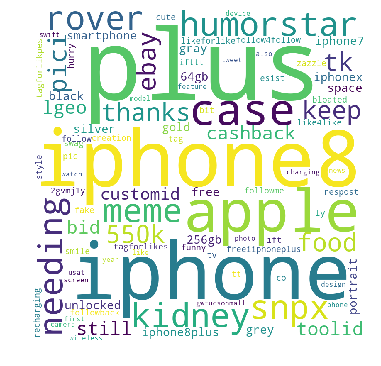

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Attributes of Apple from Non-Twitter data**

In [57]:
twitter_not_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_not_samsung_and_apple = twitter_not_samsung.loc[twitter_not_samsung['ContainsAppleKeyword']==1]
del twitter_not_samsung

transformer1,topic_distr1 = LDA(twitter_not_samsung_and_apple)
printResults(transformer1,topic_distr1)
del twitter_not_samsung_and_apple

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.012078968195556357
need : 0.010090569775835395
twitter : 0.007575812104374459
pic : 0.007096641649465362
kitty : 0.0038457319889091237
announced : 0.0037595568943854904
pettymamii : 0.0033104627933290757
stroughtonsmith : 0.0032637914717545567
swelling : 0.0028076663558200365
bought : 0.0026604489261012726
broke : 0.00239185000557607
girl : 0.002359415019402043
anyone : 0.002342127815003113
last : 0.002224202199499674
bitch : 0.002207976850638783
space : 0.0021336024913611875
decision : 0.0020939130495609888
emoji : 0.002013847404445424
trianium : 0.00199351410083778
pfw04gbmbl : 0.0019516053695617219

[Topic 1]
iphone : 0.02393301830545271
plus : 0.013039598400929305
apple : 0.012234289974728972
youtu : 0.009818909775458809
youtube : 0.009519901173769106
video : 0.009134818812040696
2017 : 0.008374495284127816
pic : 0.008269003471452867
twitter : 0.008060455241971258
9to5mac : 0.006006713751228819
liked : 0.005858591154337799
09 : 0.005776828093040756
watch : 0

In [58]:
#generating a word cloud of the most important attributes
wrds = generateWordCloud(transformer1,topic_distr1)
stp_words = ['raengi0921','exoglobal','exocastle','twitter','youtube']
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(stp_words),      
                min_font_size = 10).generate(wrds)

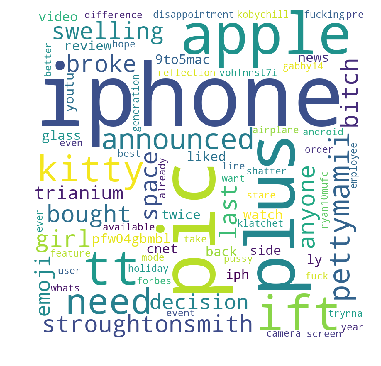

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [60]:
del transformer1,topic_distr1

## What attributes were liked the most and what attributes weren’t? (Twitter vs Non-Twitter)

**Attributes for Samsung from Twitter data for people with Positive Sentiments**

In [40]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung_and_not_apple = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
twitter_samsung_and_not_apple_pos = twitter_samsung_and_not_apple.loc[twitter_samsung_and_not_apple['nb_pos']>0.5]

del twitter_samsung,twitter_samsung_and_not_apple
# print(twitter_samsung_and_not_apple_pos.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_and_not_apple_pos)
printResults(transformer1,topic_distr1)
del twitter_samsung_and_not_apple_pos

(19750, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
galaxy : 0.013311159193802274
samsung : 0.010516897851243814
pic : 0.009730902152682208
ly : 0.006763310382347998
android : 0.005635204092833825
hate : 0.005526606758534997
korean : 0.005421624103607193
phone : 0.004967218379017481
bit : 0.004962239057756586
tt : 0.004930517766359242
ift : 0.004918817973493511
google : 0.004857917543448768
plus : 0.004449541704094286
mr : 0.0043872883181460395
drinksonme : 0.004376059276291041
vzy0vajmpp : 0.004376059276100622
case : 0.00421827747183636
best : 0.0038568960749744284
s8 : 0.0038538057475410803
pixel : 0.003795393045319143

[Topic 1]
galaxy : 0.011405398454838206
samsung : 0.010697881923575606
pic : 0.007914209720948718
look : 0.006155659872412432
black : 0.005163368572916423
know : 0.005005204615742125
everything : 0.004735540476328531
want : 0.004484621686009702
note : 0.004344400042587269
ly : 0.004045086191949203
leak : 0.003852646110114508
plus : 0.0037147791311929615
64gb : 0.0035346006923563413
color : 0.00344732313386

In [41]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Attributes for Samsung from Twitter data for people with Negative Sentiments**

In [44]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung_and_not_apple = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
twitter_samsung_and_not_apple_neg = twitter_samsung_and_not_apple.loc[twitter_samsung_and_not_apple['nb_pos']<=0.5]

del twitter_samsung,twitter_samsung_and_not_apple
# print(twitter_samsung_and_not_apple_neg.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_and_not_apple_neg)
printResults(transformer1,topic_distr1)
del twitter_samsung_and_not_apple_neg

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
galaxy : 0.01832790785152993
samsung : 0.016261379859853303
video : 0.011786697467077297
youtu : 0.010736330408015173
pic : 0.009600776585391047
liked : 0.009583728662454471
plus : 0.008558158232906963
leaked : 0.006869573325320417
ly : 0.006239686909280544
photo : 0.0056475340243212
2017 : 0.005072377882027347
fb : 0.004728080154315918
test : 0.0046462678295369
tt : 0.0044485805025546695
ift : 0.0044248352413311055
unlock : 0.004373799905893535
goo : 0.004116321326659483
s8 : 0.004015702063322467
infinity : 0.003931295999877553
phone : 0.003918181163761557

[Topic 1]
galaxy : 0.006721516368067754
pic : 0.006146343207219953
case : 0.005863310252649111
button : 0.0050755630087815804
samsung : 0.004627075521292612
bixby : 0.004616699586761946
s8 : 0.003947882507608289
desktop : 0.003675126459612552
google : 0.0035658268358092224
camera : 0.0031807048889816655
light : 0.003122691035046232
status : 0.0029696120691546147
remap : 0.0028292889842553384
record : 0.0027413679710911

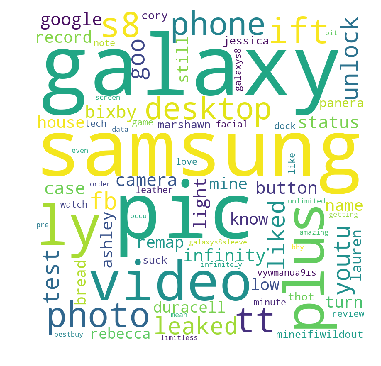

In [45]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 
del transformer1,topic_distr1

**Attributes for Apple from Twitter data for people with Negative Sentiments**

In [47]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_samsung_and_not_apple = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==1]
twitter_samsung_and_not_apple_neg = twitter_samsung_and_not_apple.loc[twitter_samsung_and_not_apple['nb_pos']<=0.5]

del twitter_samsung,twitter_samsung_and_not_apple
# print(twitter_samsung_and_not_apple_neg.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_and_not_apple_neg)
printResults(transformer1,topic_distr1)
del twitter_samsung_and_not_apple_neg

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
trynna : 0.04254872583628
klatchet : 0.041355158745545295
iphone : 0.0390334950724314
fuck : 0.038995013842240564
plus : 0.018582189033535503
video : 0.016205384036908254
youtu : 0.01537566344459177
liked : 0.011691620930406576
pic : 0.007985030269206744
first : 0.006852096531802952
apple : 0.006221415689264841
leak : 0.005616077911988956
unboxing : 0.005393680467134259
stroughtonsmith : 0.004998780923423036
forbes : 0.0048166577342433434
feature : 0.004506367431272411
review : 0.004432182247679085
charging : 0.004036531757087603
wireless : 0.004031675968115687
ly : 0.004021519320001216

[Topic 1]
battery : 0.010534896253100398
iphone : 0.010216237839933669
9to5mac : 0.007542558789101174
pic : 0.0074993340247730906
plus : 0.005884223576287617
10 : 0.0054240667760443746
review : 0.005053095837405952
life : 0.0046092960627453815
2017 : 0.004542022051894494
swelling : 0.0044616246790486975
take : 0.004363296149931497
edge : 0.004342268692342344
bitch : 0.0038639091041139458
i

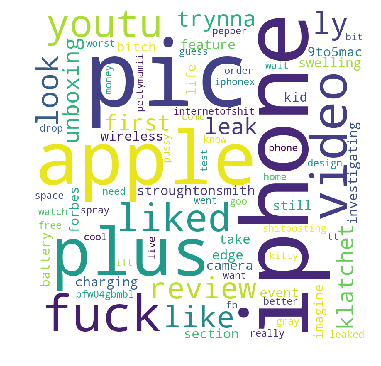

In [48]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Attributes for Apple from Twitter data for people with Positive Sentiments**

In [50]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_samsung_and_not_apple = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==1]
twitter_samsung_and_not_apple_pos = twitter_samsung_and_not_apple.loc[twitter_samsung_and_not_apple['nb_pos']>0.5]

del twitter_samsung,twitter_samsung_and_not_apple
# print(twitter_samsung_and_not_apple_pos.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_and_not_apple_pos)
printResults(transformer1,topic_distr1)
del twitter_samsung_and_not_apple_pos

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.025131703308473415
plus : 0.01603681155479198
apple : 0.012316052699380907
generation : 0.00974339541392779
take : 0.008091003306555005
mode : 0.008023225338262604
youtu : 0.0078117372267373026
pic : 0.007441076712405613
hope : 0.007316082346325778
1000 : 0.00721695134404404
airplane : 0.00706846049414686
fucking : 0.0069212941820052665
holiday : 0.006880042914921448
ryan10mufc : 0.0065878306741132975
feature : 0.00629155018187932
iphone8 : 0.006234050863161258
like : 0.005706136389358368
year : 0.0056609781148607
video : 0.005494902233480306
even : 0.005450972215196946

[Topic 1]
iphone : 0.014879640550801336
difference : 0.013057526127997926
pic : 0.011345230943668058
employee : 0.01124245398910187
whats : 0.010200500593722153
apple : 0.007807016219489062
today : 0.006969080815778813
wshhfans : 0.005917728163093478
0xy96vskqk : 0.005917727986077865
cards : 0.005485389327375401
plus : 0.004584427037350921
shot : 0.004003932942606796
forbes : 0.00357843703794711

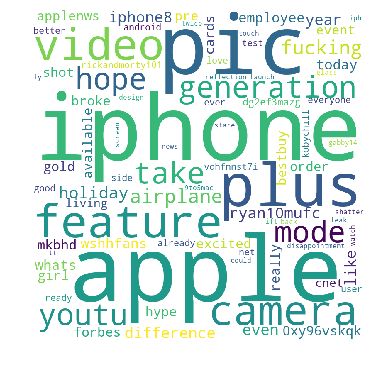

In [51]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Attributes for Apple from Non-Twitter data for people with Positive Sentiments**

In [53]:
others_not_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_not_samsung_and_apple = others_not_samsung.loc[others_not_samsung['ContainsAppleKeyword']==1]
others_not_samsung_and_apple_pos = others_not_samsung_and_apple.loc[others_not_samsung_and_apple['nb_pos']>0.5]

del others_not_samsung,others_not_samsung_and_apple
# print(others_not_samsung_and_apple_pos.shape)
transformer1,topic_distr1 = LDA(others_not_samsung_and_apple_pos.sample(20000))
printResults(transformer1,topic_distr1)
del others_not_samsung_and_apple_pos

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.016414531045985364
apple : 0.009806383520572285
plus : 0.00632388983866192
phone : 0.0040859729856239655
camera : 0.003197600652822418
feature : 0.002753964290870877
year : 0.002675441400021323
device : 0.0026080776755363195
news : 0.0024929249313578347
charging : 0.002457983911011068
like : 0.00243895824790762
also : 0.002435416576843336
wireless : 0.002394685041077202
screen : 0.0023167493337277615
first : 0.0022783834628784232
design : 0.0022752099524685735
case : 0.0022662385220286385
model : 0.0022568593621380205
2017 : 0.002152645592688281
watch : 0.0021355688828511984

[Topic 1]
iphone8 : 0.013571814191813279
iphone8plus : 0.010753978870687894
iphone : 0.008439269791090546
gold : 0.00668765689560085
plus : 0.006235176205848202
iphonex : 0.005661771902003638
unlocked : 0.005493752734251633
64gb : 0.004941201882732899
apple : 0.00490122095241153
silver : 0.004393658818021923
256gb : 0.0038580865787168034
space : 0.0026827930655807146
smartphone : 0.00267260

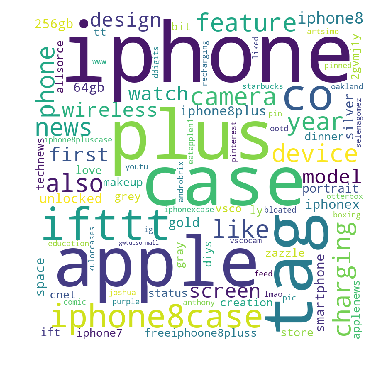

In [54]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Attributes for Apple from Non-Twitter data for people with Negative Sentiments**

In [56]:
others_not_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_not_samsung_and_apple = others_not_samsung.loc[others_not_samsung['ContainsAppleKeyword']==1]
others_not_samsung_and_apple_pos = others_not_samsung_and_apple.loc[others_not_samsung_and_apple['nb_pos']<=0.5]

del others_not_samsung,others_not_samsung_and_apple
# print(others_not_samsung_and_apple_pos.shape)
transformer1,topic_distr1 = LDA(others_not_samsung_and_apple_pos.sample(30000))
printResults(transformer1,topic_distr1)
del others_not_samsung_and_apple_pos

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.01974305866687984
apple : 0.00983142407824979
plus : 0.007927167116849085
phone : 0.006478175101040699
like : 0.00470093019846338
battery : 0.003678863190596706
look : 0.0033786223362176943
video : 0.003304283364848425
2017 : 0.0031589963733987506
would : 0.003098619859137822
charging : 0.0030841959550430304
camera : 0.0030369856132754828
year : 0.0029275590099159077
screen : 0.0027864274947741637
update : 0.0027702743427933238
review : 0.0027534197429879568
feature : 0.002744655310092104
tag : 0.00274211975786452
device : 0.00271435134800248
wireless : 0.002705874401028059

[Topic 1]
iphone : 0.00433066475775101
iphone8 : 0.004291971485479585
kidney : 0.003823235980833939
needing : 0.00373011194537515
iphone8plus : 0.003635572759615186
humorstar : 0.003575827335823717
thanks : 0.003227372980349441
keep : 0.002948738501119526
camera : 0.002811105001854137
still : 0.0026760916873537653
meme : 0.0025408201287535933
testing : 0.002380557234202675
tag : 0.0020913701

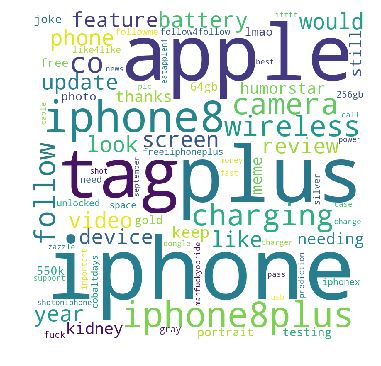

In [57]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Attributes for Samsung from Non-Twitter data for people with Negative Sentiments**

In [59]:
others_not_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_not_samsung_and_apple = others_not_samsung.loc[others_not_samsung['ContainsAppleKeyword']==0]
others_not_samsung_and_apple_pos = others_not_samsung_and_apple.loc[others_not_samsung_and_apple['nb_pos']<=0.5]

del others_not_samsung,others_not_samsung_and_apple
# print(others_not_samsung_and_apple_pos.shape)
transformer1,topic_distr1 = LDA(others_not_samsung_and_apple_pos.sample(20000))
printResults(transformer1,topic_distr1)
del others_not_samsung_and_apple_pos

(21305, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
galaxys8 : 0.005338746281350004
samsunggalaxy : 0.0044206705365241105
photooftheday : 0.0037627309197630983
happy : 0.0036859656618342712
like4like : 0.0034321775233750263
picoftheday : 0.003320665564431783
cute : 0.003301265762680647
love : 0.003298396059179367
amazing : 0.0031889607589493333
selfie : 0.003185845962066637
samsung : 0.0031398934173998043
followme : 0.0029602331578580405
girl : 0.0029027301274389796
style : 0.0028806263353781327
instalike : 0.0028801518045373487
hardwarezone : 0.002822143311534103
smartphone : 0.002804618001654219
insta : 0.002723718135699789
follow4follow : 0.0026184082785190334
likeforfollow : 0.002606296828997462

[Topic 1]
galaxy : 0.014203211334359318
samsung : 0.013012123700771145
phone : 0.007048910986388753
plus : 0.0052020449409424865
2017 : 0.005028305229046697
update : 0.004659688638190872
android : 0.004340085841208755
video : 0.004093144444023277
device : 0.0035307449598695434
google : 0.003237385808717164
tech : 0.003159114778

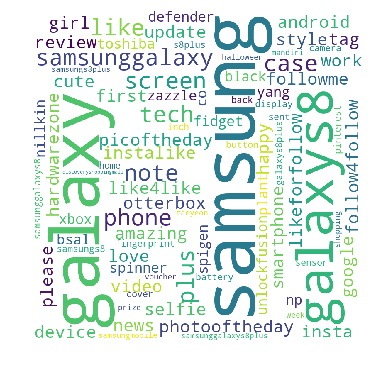

In [60]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Attributes for Samsung from Non-Twitter data for people with Positive Sentiments**

In [62]:
others_not_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_not_samsung_and_apple = others_not_samsung.loc[others_not_samsung['ContainsAppleKeyword']==0]
others_not_samsung_and_apple_pos = others_not_samsung_and_apple.loc[others_not_samsung_and_apple['nb_pos']>0.5]

del others_not_samsung,others_not_samsung_and_apple
# print(others_not_samsung_and_apple_pos.shape)
transformer1,topic_distr1 = LDA(others_not_samsung_and_apple_pos.sample(20000))
printResults(transformer1,topic_distr1)
del others_not_samsung_and_apple_pos

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
galaxys8 : 0.012382263638182223
co : 0.009010382042341334
samsunggalaxys8 : 0.007884749155460386
galaxys8plus : 0.007730584880993858
samsunggalaxy : 0.007125323090032726
samsung : 0.006497955198947603
s8plus : 0.006349376097623864
galaxy : 0.005465586330893162
samsunggalaxys8plus : 0.004914446118394917
samsungs8 : 0.004408925909973983
galaxys7 : 0.004031170273936947
samsungblog : 0.004011516127306351
smartphone : 0.003665828293253354
unboxyourphone : 0.0035444985868941913
plus : 0.003517085710346688
tag : 0.00324165581837985
galaxys7edge : 0.0032337937258876946
ifttt : 0.002631832452012408
tech : 0.002511721322128771
s7edge : 0.0023035387802016662

[Topic 1]
goo : 0.003864721162292115
case : 0.0016452292591331806
shield : 0.0014958581574309796
frosted : 0.0013118399931846124
linux : 0.00116820470917015
nillkin : 0.0008065078584271636
anti : 0.0007350895942727358
url : 0.0007209655442018196
id : 0.0007020321992086624
tv : 0.0007016083367686477
mashtalk : 0.00068678715398883

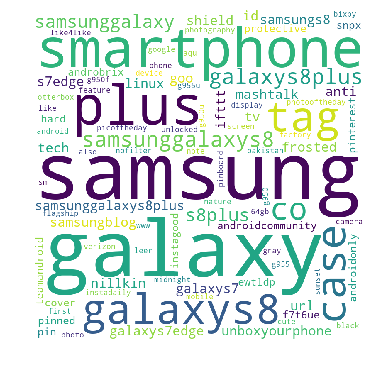

In [63]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

## In particular, how did consumers feel about the Quality, Price and “Value” for each product? (Twitter vs Non-Twitter)

**Twitter data - Quality of Samsung**

In [124]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
twitter_samsung_quality = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(quality_str)==True]


del twitter_samsung,twitter_samsung1
# print(twitter_samsung_quality.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_quality)
printResults(transformer1,topic_distr1)
del twitter_samsung_quality

(169, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
qualitycheck : 0.0038289955550981454
galaxy : 0.0038083222876574285
pic : 0.0038001255257089513
instagram : 0.003761297637266987
selfie : 0.0037583540854618344
bzou6ulaubz1 : 0.0036951596910007236
test : 0.0036142425342928037
samsung : 0.0034554371358433943
ppflbpvghm : 0.0033218360724547196
quality : 0.003243808714469959
supposed : 0.0032394938474835126
samsun : 0.0031928952373785867
double : 0.003186930122831411
bbcinfo : 0.0031679125486554975
05 : 0.0031221038934462677
phone : 0.0028326323287494255
tech : 0.0026500300437854894
verizon : 0.002555610022237568
2017 : 0.002496394772608044
news : 0.002375248926727568

[Topic 1]
info : 0.01681637713408365
categories : 0.016733176958239317
us : 0.016568936064868353
unlocked : 0.014843186968173753
64gb : 0.014704213366195722
sm : 0.012751803798933184
stonefeuer : 0.010953298698246768
samsung : 0.010540452254618913
olwen : 0.009929201018590038
smartphone : 0.009394948466812245
black : 0.009229088591057396
flussstone : 0.00891880

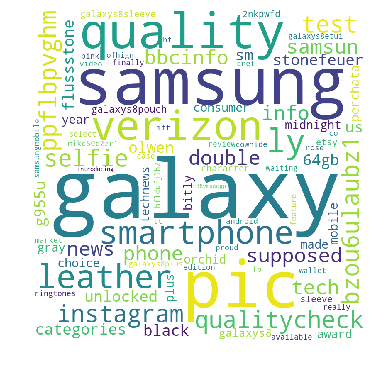

In [125]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Twitter data - Price of Samsung**

In [127]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
twitter_samsung_price = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(price_str)==True]


del twitter_samsung,twitter_samsung1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(490, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
000 : 0.004356464053178665
wp : 0.003915164789460205
itechdude : 0.0034212277281164684
p67m4w : 0.0033381558315030563
cost : 0.00323251488912061
galaxy : 0.0028430109548318438
technology : 0.0028071396865741237
mobile : 0.0026751932843331163
pic : 0.002654426998034452
goo : 0.0025482637977408845
gadgets : 0.002545459695867961
report : 0.0024565466827884716
material : 0.002312280890440228
plus : 0.002283653440673379
samsung : 0.0022601286429946637
compared : 0.002158231514824336
xperia : 0.0020657062482169583
blog : 0.0018908864912319842
sony : 0.001886603038672195
nlrhgz : 0.0018394211036852977

[Topic 1]
samsung : 0.02681271375274978
galaxy : 0.024587052321323945
price : 0.019348811424163656
pic : 0.012281226557560828
spec : 0.01203728902410156
feature : 0.011420426238785267
cost : 0.01015201456470962
phone : 0.009558612202681675
full : 0.009389499905114982
specification : 0.00896261386898252
date : 0.00852311351292393
mistyinfo : 0.008186336072235824
much : 0.00801476853

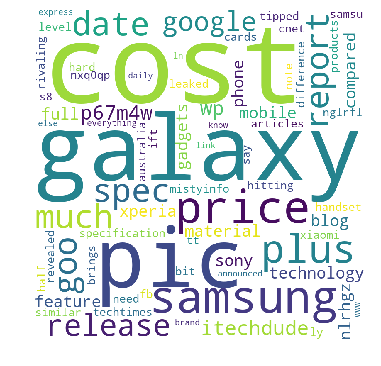

In [128]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Twitter data - Value of Samsung**

In [130]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==1]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==0]
twitter_samsung_price = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(value_str)==True]

del twitter_samsung,twitter_samsung1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(286, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
hometown : 0.02411631842185414
jackandjack : 0.024115989777998587
early : 0.0239509698272553
samsungmobileus : 0.023565022079996167
surprised : 0.023314181393246012
tomorrow : 0.0231945469256543
id5s97uh97 : 0.023179096988209427
pic : 0.019894226305818045
galaxy : 0.01735334816615367
microsoft : 0.010269109180077163
samsung : 0.009317840922524835
edition : 0.00654064590756131
goo : 0.0054051662684382615
true : 0.005361602309255389
reveals : 0.005344846965953492
business : 0.005336090504127605
strategy : 0.0051708613246091075
video : 0.004980768192407948
note : 0.00469628781410599
fb : 0.004602947000203667

[Topic 1]
galaxy : 0.007326802806303822
samsung : 0.0072389226393137366
cards : 0.007208799343542061
surprise : 0.0064161024625339945
pic : 0.006385136244343689
galaxys8 : 0.0048000467166204805
youtu : 0.004361822427128612
free : 0.004174898950087035
ts : 0.00417127460794375
appreciated : 0.004068342658443013
8eleb : 0.0039736707766823715
month : 0.003967866123507596
47 

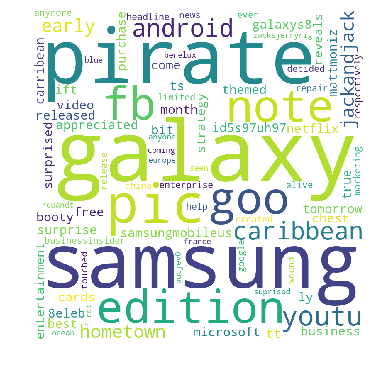

In [131]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Twitter data - Value of Apple**

In [132]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==1]
twitter_samsung_price = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(value_str)==True]


del twitter_samsung,twitter_samsung1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(303, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.01147474491989735
know : 0.010643601406925166
guy : 0.01054596894023396
stat : 0.010434731646002076
devalue : 0.010396496568989588
tunnyking : 0.01038739161651694
jackdre02 : 0.010368506097895875
wife : 0.010367860720821185
king : 0.010349462601524851
worth : 0.010347636175067957
keep : 0.010337917283388624
virginity : 0.010210193331137605
future : 0.010185743290048097
launch : 0.00706780188293928
apple : 0.006214127324763848
time : 0.005563817644308204
ly : 0.005495473130297956
something : 0.005118769538551766
series : 0.004439669498223447
pic : 0.004391355867649452

[Topic 1]
iphone : 0.011048416273477695
pic : 0.00693177885339093
glass : 0.0059868972162602264
video : 0.005703945777678002
youtu : 0.005017434386664024
loyalty : 0.004906382943053723
score : 0.004899719279338396
ahead : 0.004885186997667613
plus : 0.004836747760144142
apple : 0.004789091379793123
tt : 0.004656145206308606
fast : 0.004634951863004922
ift : 0.004587429329872631
recent : 0.004490804

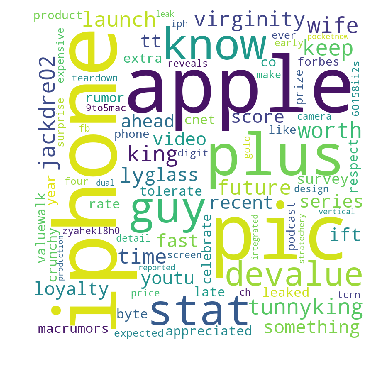

In [133]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Twitter data - Price of Apple**

In [134]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==1]
twitter_samsung_price = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(price_str)==True]


del twitter_samsung,twitter_samsung1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(649, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
could : 0.012350695544640388
pic : 0.01008178626353867
iphone : 0.009281947095148896
cost : 0.008652885574726809
200 : 0.007212865907138714
since : 0.006911149018039676
include : 0.006772400528223025
airpods : 0.006671462890310927
itwe4kz : 0.0066641592041702495
bnhnzbdr4o : 0.006656497757712451
think : 0.006474312440314811
revealed : 0.005818163019736859
price : 0.005711389430402645
like : 0.005613611466640264
analyst : 0.005161185354292772
start : 0.005127649182619414
still : 0.004688907326193529
street : 0.004576460972296872
wall : 0.004570086217536598
look : 0.0043309111528318095

[Topic 1]
android : 0.014789380706535652
drop : 0.014716942450413502
waiting : 0.014565287247798686
flagship : 0.0142037958391436
price : 0.009602177517519373
iphone : 0.008163866026460109
target : 0.00399970619286157
raise : 0.003977601511274186
already : 0.003644375637102585
cheaper : 0.0036423475450602883
apple : 0.003471509725089067
take : 0.002869108149317133
ahead : 0.00269699023712095


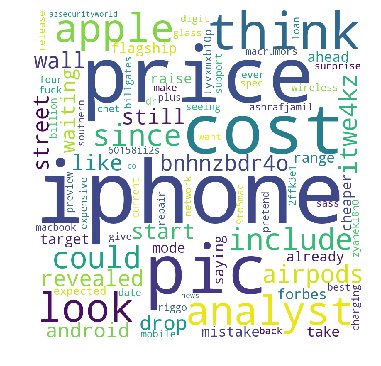

In [135]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Twitter data - Quality of Apple**

In [136]:
twitter_samsung = twitter_data.loc[twitter_data['ContainsSamsungKeyword']==0]
twitter_samsung1 = twitter_samsung.loc[twitter_samsung['ContainsAppleKeyword']==1]
twitter_samsung_price = twitter_samsung1.loc[twitter_samsung1['Post Words'].str.contains(quality_str)==True]


del twitter_samsung,twitter_samsung1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(167, 50)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.017500938696029852
display : 0.016415527403699216
real : 0.01606165189620354
basically : 0.01605786929740999
12mp : 0.016021937681485313
chip : 0.015967792779398554
mkbhd : 0.015964881146898886
true : 0.015953068028332962
bump : 0.01594038751720526
spec : 0.015921928388426324
tone : 0.015910654671501944
bionic : 0.015909490513537156
updated : 0.015899587660095374
pick : 0.015867480532159126
9to5mac : 0.01563781298215896
camera : 0.015421895095155538
confirms : 0.009025366306182529
revised : 0.008963634036117439
08 : 0.008939397875292946
leak : 0.00889708626655196

[Topic 1]
iphone : 0.01434385801552559
plus : 0.010285809643541175
pic : 0.010088324722098127
apple : 0.008601185912406394
quality : 0.0075751968404818145
choice : 0.005909604492829932
tone : 0.005753805055868748
true : 0.0056451994889325985
display : 0.00482186921516283
09 : 0.00455544893632116
categories : 0.004417897287278943
us : 0.004395150046512794
info : 0.004377194830694802
glass : 0.0042319596

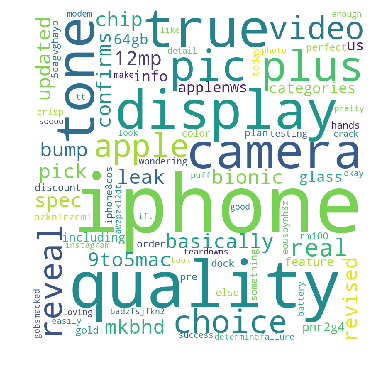

In [137]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Quality of Apple**

In [138]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==1]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(quality_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(10653, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone : 0.01677729231409531
apple : 0.007715387273301389
plus : 0.007303060993158683
camera : 0.0047035904538089
phone : 0.003745547232791507
case : 0.0032488563241862677
display : 0.0030155385394855893
feature : 0.0029885909935305744
quality : 0.002985730209198242
also : 0.0026781622062144535
charging : 0.0025982365365753365
like : 0.0025078914932198217
device : 0.002409755531744338
video : 0.002405653178849523
screen : 0.0024008276489415068
glass : 0.00218643211705967
wireless : 0.0021574340257741755
tone : 0.002108250170507624
true : 0.0020592087238828966
model : 0.0020160383805547964

[Topic 1]
nigerian : 0.0026852277509509114
davido : 0.0015491236367646858
tagbo : 0.001017810115947754
drinking : 0.0009175225921809415
hushpuppi : 0.0009150694777819452
billionaire : 0.000903874829575158
gucci : 0.000902168279373588
hehe : 0.0008968130272948813
n424 : 0.0008889207104160442
whooping : 0.0008889204604276494
148usd : 0.0008889200443015724
captioned : 0.0008889199395501698


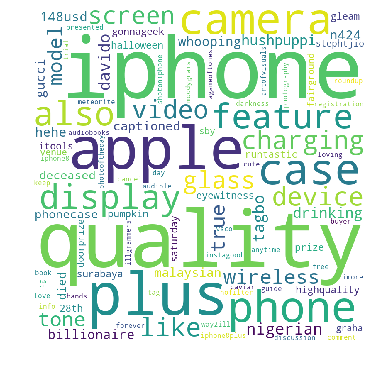

In [139]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Price of Apple**

In [140]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==1]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(price_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(18723, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
irrelevant : 0.010085258100659153
flag : 0.010053608473781414
costume : 0.0020127241803504625
diys : 0.0018851309624877649
halloween : 0.0017881630156174903
skinit : 0.0017352802158670697
ftag : 0.0015424344216525224
davido : 0.0013323632365084984
evga : 0.0012739068760528242
prize : 0.001118257024428544
ticket : 0.0010139409639591589
burlingame : 0.0010098092802682675
cadf328eec : 0.0009984942773160028
defeating : 0.0009628437049495216
priceless : 0.0009497514337559243
typewriter : 0.0009337783631128661
gizmodo : 0.0009243086447654235
extravaganza : 0.0008757350691403348
daughter : 0.0008578227499094653
tagbo : 0.0008366518511941299

[Topic 1]
unlocked : 0.003297089229664308
600usd : 0.0021152793707676183
rover : 0.002083888647861842
0019842085304 : 0.0019920659513516688
19842085304 : 0.0019920659513499124
550usd : 0.0019920659493061423
chat : 0.0019550550576007126
1year : 0.0018977199310683294
whatsapp : 0.0018421479918602271
serious : 0.0017379653367093125
contact : 0.0

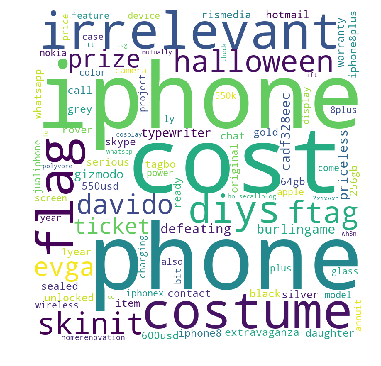

In [141]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Value of Apple**

In [142]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==0]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==1]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(value_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(17595, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
iphone8plus : 0.002906325995698548
iphone8 : 0.002195896893202062
cashback : 0.0013679148239017084
grateful : 0.00096999066789739
rssmix : 0.0009421942336310248
act : 0.0008993990681828646
hunt : 0.0007218285805582157
instagood : 0.0006847246626583678
parody : 0.0006334920730134746
love : 0.0006058636014961829
powell : 0.0006051285570482974
lesson : 0.0005792633126996585
8177974 : 0.0005586845370544861
stratechery : 0.0005483316916737787
repost : 0.0005473411717374267
vibrate : 0.0005235429345844482
prise : 0.0005197678297674928
conformation : 0.0005139733077766482
iphonex : 0.0005116156688515942
statue : 0.0005061746487569797

[Topic 1]
co : 0.0031482143032890084
davido : 0.002408018385328793
tagbo : 0.001922782810323431
keyboard : 0.001897140290650777
download : 0.001470991509998438
drinking : 0.0010749047656676929
lady : 0.0009948903494061672
police : 0.000982525305690886
caviar : 0.0009572223286371893
pok : 0.000941325600449765
mon : 0.0009413241049180005
obliterates :

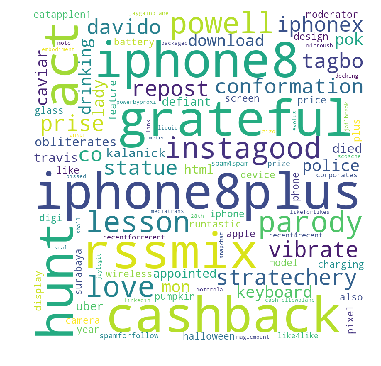

In [143]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Value of Samsung**

In [146]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==0]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(value_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(16724, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
sculpture : 0.0017548041006077897
milan : 0.0012740268248685378
samsunggalaxys8 : 0.0011259131283577423
gagt : 0.0009754011527988364
ives : 0.0009561437885112806
zaha : 0.0009445398171464057
rssmix : 0.000914611580115339
stonehenge : 0.0009081051633306253
architect : 0.000884289599995093
hadid : 0.0008668886885176175
cornwall : 0.0008124170856375702
unconfined : 0.0008077982725565571
tag : 0.0007879074546564827
co : 0.0007455618070714722
androbrix : 0.0007388267202602031
installation : 0.0007175953382499206
reboots : 0.0006040337550611583
moraltime : 0.0006027700406827507
8177974 : 0.0005896262749646977
strewn : 0.0005459622567611196

[Topic 1]
case : 0.006901137667991919
protector : 0.00476407639765641
spigen : 0.0035056219783441154
armor : 0.0026385571209443875
wallet : 0.0023601871497502813
protection : 0.00215639874529562
goo : 0.002125804940991275
pakistan : 0.001897858935602807
tempered : 0.0018827096210147804
bumper : 0.0016952595045341395
shock : 0.0016004011248353

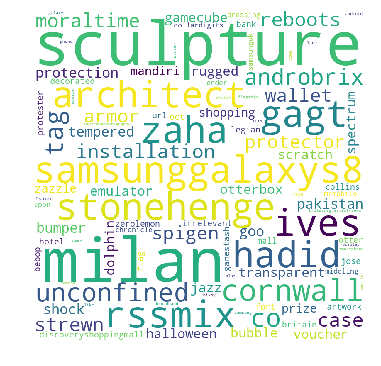

In [147]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Quality of Samsung**

In [149]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==0]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(quality_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
ig : 0.003118706877654905
agameoftones : 0.0027043986189087205
galaxys8 : 0.0025015778110798795
moodygrams : 0.002201811916093463
photography : 0.0020420203204688015
vsco : 0.001970996826038708
exploretocreate : 0.0018748930859973068
justgoshoot : 0.0017824269889375516
earth : 0.0017471594995241175
expofilm : 0.00166334951490216
vscocam : 0.0016054676658509668
samsunggalaxys8 : 0.0015751575011081344
shots : 0.0015430820651061725
bleachmyfilm : 0.0014651726724430037
captured : 0.0014622813331764324
vscofilter : 0.0014592631629288865
shot : 0.0013867165816443688
shotz : 0.0013205932429271618
galaxys8plus : 0.0012805731311053873
photographyislifee : 0.0012643687958821762

[Topic 1]
halloween : 0.0026403863801790248
voucher : 0.0025309108425976825
shopping : 0.0023235819821618453
prize : 0.0018455275328921822
mandiri : 0.0017640629162174782
discoveryshoppingmall : 0.001741600041892646
bank : 0.0015260171254705863
mall : 0.0009577205957355467
primeras : 0.0009321079857118928
so

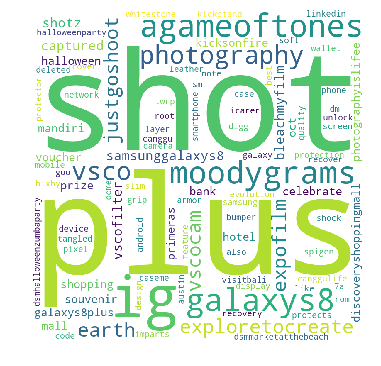

In [150]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

**Non-Twitter data - Price of Samsung**

In [151]:
others_apple = others_data.loc[others_data['ContainsSamsungKeyword']==1]
others_apple1 = others_apple.loc[others_apple['ContainsAppleKeyword']==0]
twitter_samsung_price = others_apple1.loc[others_apple1['Post Words'].str.contains(price_str)==True]


del others_apple,others_apple1
# print(twitter_samsung_price.shape)
transformer1,topic_distr1 = LDA(twitter_samsung_price)
printResults(transformer1,topic_distr1)
del twitter_samsung_price

(14872, 51)
hi


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


bi
[Topic 0]
luxlady : 0.0034173539904972386
amethyst : 0.0015250268879297485
930 : 0.001519858994420697
depot : 0.0012521523076078351
830 : 0.0011412786838926447
backplate : 0.0011356738824395882
snap : 0.001044520748582475
aluminum : 0.0009726081786976926
brazilian : 0.0008236489313771378
gemologist : 0.0007753393077217828
monotony : 0.0007753315922107674
submarino : 0.0007481083208031455
polling : 0.0007481079343191974
photoshopped : 0.0007226880105329195
oukitel : 0.000686769882266602
nrf52840 : 0.000582054244044638
publisher : 0.000559833197785308
label : 0.0005554528670060389
robotbanana : 0.0005496231728579666
studio : 0.0005109601536553203

[Topic 1]
galaxy : 0.013138288706997249
samsung : 0.010858845713652686
phone : 0.006357982657125011
price : 0.005075518625698082
plus : 0.004738918691019118
device : 0.0034452959752196283
screen : 0.003420865391405085
camera : 0.0031571702282689445
display : 0.0029243635471047575
cost : 0.0028806197195870215
also : 0.002872359710733656
note 

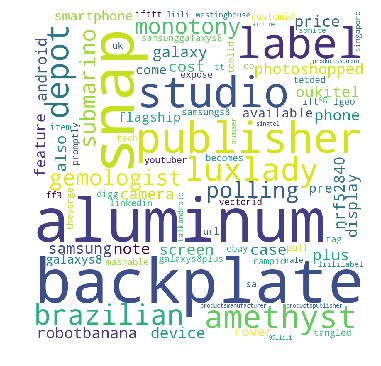

In [152]:
wrds = generateWordCloud(transformer1,topic_distr1)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords = set(),      
                min_font_size = 10).generate(wrds)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
del transformer1,topic_distr1

## Can you predict the uptake or adoption of the product by looking solely at the pre-release data? Can you “validate” that by looking at the post-release data?
### Uses the sentiment prior to launch to train and testing for it after launch

**Samsung Data**

In [56]:
train_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==1]
train_samsung1 = train_samsung.loc[train_samsung['ContainsAppleKeyword']==0]
train_samsung_final = train_samsung1[train_samsung1['SamsungLaunch']=='pre']
# print(train_samsung1['SamsungLaunch'].unique())
labels_samsung_ = np.where(train_samsung_final['nb_pos']< 0.5, 0,1)

train_samsung_ = train_samsung_final['Post Words']
# print(train_samsung_.shape)
del train_samsung,train_samsung1,train_samsung_final

train_apple = others_data.loc[others_data['ContainsSamsungKeyword']==0]
train_apple1 = train_apple.loc[train_apple['ContainsAppleKeyword']==1]
train_apple_final = train_apple1.loc[train_apple1['AppleLaunch']=='pre']

train_apple_ = train_apple_final['Post Words']
labels_apple_ = np.where(train_apple_final['nb_pos']< 0.5, 0,1)
del train_apple,train_apple1,train_apple_final

from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=10000)
t.fit_on_texts(train_samsung_)
x = t.texts_to_sequences(train_samsung_)

from keras.preprocessing.sequence import pad_sequences

X_samsung = pad_sequences(x, maxlen=120)
print(X_samsung.shape)

['post' 'pre']
(64550,)
(64550, 120)


In [87]:
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Embedding, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(X_samsung.shape[0], 64,input_length = X_samsung.shape[1]))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 64)           4131200   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,164,289
Trainable params: 4,164,289
Non-trainable params: 0
_________________________________________________________________


In [88]:
lstm_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [59]:
history = lstm_model.fit(X_samsung, labels_samsung_, validation_split=0.2, epochs=5, batch_size=512)

Train on 51640 samples, validate on 12910 samples
Epoch 1/5
51640/51640 [==============================] - 21s 410us/step - loss: 0.3157 - acc: 0.8874 - val_loss: 0.2565 - val_acc: 0.8926
Epoch 2/5
51640/51640 [==============================] - 20s 392us/step - loss: 0.2108 - acc: 0.9171 - val_loss: 0.2229 - val_acc: 0.9206
Epoch 3/5
51640/51640 [==============================] - 20s 392us/step - loss: 0.1671 - acc: 0.9361 - val_loss: 0.1921 - val_acc: 0.9315
Epoch 4/5
51640/51640 [==============================] - 20s 389us/step - loss: 0.1444 - acc: 0.9454 - val_loss: 0.1967 - val_acc: 0.9342
Epoch 5/5
51640/51640 [==============================] - 20s 389us/step - loss: 0.1297 - acc: 0.9518 - val_loss: 0.1840 - val_acc: 0.9350


In [71]:
results = lstm_model.predict(X_samsung)

In [85]:
sum=0
count=0
for x in results:
    if x[0]>0.5:
        sum += 1
    count+=1
    
AdoptionRate = (sum/count)
print(AdoptionRate)
print(labels_samsung_.sum()/len(labels_samsung_))

0.9070178156467854
0.8847405112316034


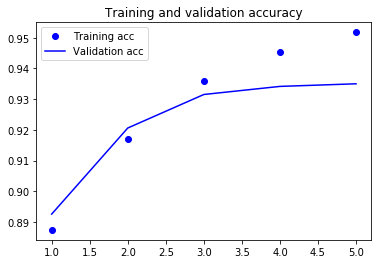

In [60]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [64]:
#testing on post launch Samsung data
test_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==1]
test_samsung1 = test_samsung.loc[test_samsung['ContainsAppleKeyword']==0]
test_samsung_final = test_samsung1[test_samsung1['SamsungLaunch']=='post']
# print(test_samsung1['SamsungLaunch'].unique())
labels_samsung_test = np.where(test_samsung_final['nb_pos']< 0.5, 0,1)

test_samsung_ = test_samsung_final['Post Words']
# print(test_samsung_.shape)
del test_samsung,test_samsung1,test_samsung_final

['post' 'pre']
(98835,)


In [65]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=10000)
t.fit_on_texts(test_samsung_)
x = t.texts_to_sequences(test_samsung_)

from keras.preprocessing.sequence import pad_sequences
X_samsung_test = pad_sequences(x, maxlen=120)
print(X_samsung_test.shape)

(98835, 120)


In [66]:
test_loss_lstm, test_acc_lstm = lstm_model.evaluate(X_samsung_test, labels_samsung_test)
print('Test accuracy:', test_acc_lstm)

98835/98835 [==============================] - 46s 463us/step
Test accuracy: 0.823766884202147


In [79]:
postResults = lstm_model.predict(X_samsung_test)

In [84]:
sum=0
count =0
for x in postResults:
    if(x[0]>0.5):
        sum += 1
    count+=1
    
ActualAdoptionRate = (sum/count)
print(ActualAdoptionRate)
print(labels_samsung_test.sum()/len(labels_samsung_test))

0.9491374513077351
0.8597561592553246


**Apple Data**

In [86]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=10000)
t.fit_on_texts(train_apple_)
x = t.texts_to_sequences(train_apple_)

from keras.preprocessing.sequence import pad_sequences

X_apple = pad_sequences(x, maxlen=120)
print(X_apple.shape)

(70972, 120)


In [89]:
history = lstm_model.fit(X_apple, labels_apple_, validation_split=0.2, epochs=5, batch_size=512)

Train on 56777 samples, validate on 14195 samples
Epoch 1/5
56777/56777 [==============================] - 23s 402us/step - loss: 0.3691 - acc: 0.8437 - val_loss: 0.3399 - val_acc: 0.8572
Epoch 2/5
56777/56777 [==============================] - 22s 385us/step - loss: 0.2618 - acc: 0.8910 - val_loss: 0.3282 - val_acc: 0.8673
Epoch 3/5
56777/56777 [==============================] - 22s 385us/step - loss: 0.2137 - acc: 0.9132 - val_loss: 0.3173 - val_acc: 0.8759
Epoch 4/5
56777/56777 [==============================] - 22s 386us/step - loss: 0.1896 - acc: 0.9239 - val_loss: 0.3299 - val_acc: 0.8773
Epoch 5/5
56777/56777 [==============================] - 22s 385us/step - loss: 0.1762 - acc: 0.9298 - val_loss: 0.3217 - val_acc: 0.8740


In [90]:
results1 = lstm_model.predict(X_apple)

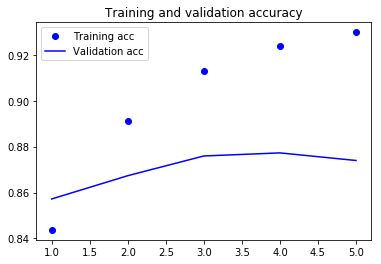

In [91]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [92]:
sum=0
count=0
for x in results1:
    if x[0]>0.5:
        sum += 1
    count+=1
    
AdoptionRate = (sum/count)
print(AdoptionRate)
print(labels_apple_.sum()/len(labels_apple_))


0.8274108098968608
0.8305388040353943


In [93]:
#testing on post launch Apple data
test_samsung = others_data.loc[others_data['ContainsSamsungKeyword']==0]
test_samsung1 = test_samsung.loc[test_samsung['ContainsAppleKeyword']==1]
test_samsung_final = test_samsung1[test_samsung1['AppleLaunch']=='post']
# print(test_samsung1['SamsungLaunch'].unique())
labels_apple_test = np.where(test_samsung_final['nb_pos']< 0.5, 0,1)

test_apple_ = test_samsung_final['Post Words']
# print(test_apple_.shape)
del test_samsung,test_samsung1,test_samsung_final

(98835,)


In [94]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=10000)
t.fit_on_texts(test_apple_)
x = t.texts_to_sequences(test_apple_)


from keras.preprocessing.sequence import pad_sequences
X_apple = pad_sequences(x, maxlen=120)
print(X_apple.shape)

(89912, 120)


In [95]:
print(test_apple_.shape)

(89912,)


In [96]:
test_loss_lstm, test_acc_lstm = lstm_model.evaluate(X_apple, labels_apple_test)
print('Test accuracy:', test_acc_lstm)

89912/89912 [==============================] - 41s 451us/step
Test accuracy: 0.7091934335848034


In [97]:
results2 = lstm_model.predict(X_apple)

In [98]:
sum=0
count=0
for x in results2:
    if x[0]>0.5:
        sum += 1
    count+=1
    
AdoptionRate = (sum/count)
print(AdoptionRate)
print(labels_apple_test.sum()/len(labels_apple_test))

0.8593958537236409
0.765782098051428


In [99]:
del lstm_model,X_apple,labels_apple_test,labels_apple_,X_samsung_test,X_samsung,labels_samsung_